<h1 style="color:#2192f1"> PARIS HOUSING PRICES PREDICTION</h1>


<h2> <span style="color:#12f095">GOAL : </span> Predict sales prices four each house using : <br><br> <span style="color:#7b55e1; font-style:oblique">Linear Regression<br>Decision Tree Regressor<br> Random Forest Regressor<br>XGBoost Regressor<br></span></h2>



<h2 style="color:#f0e912">IMPORTING LIBRARIES</h2>


In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from src import evaluation, residual_distribution, run_all_metrics
from sklearn.model_selection import cross_val_score
import warnings

from src.evaluate import run_all_metrics

warnings.filterwarnings("ignore", category=UserWarning)
from tqdm import tqdm
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error

from sklearn.inspection import PartialDependenceDisplay
from sklearn import preprocessing

print("import successful")


import successful


<h2 style="color:#f0e912"><br>DATA EXPLORATION</h2>


In [ ]:
# Load data
data = pd.read_csv("../data/ParisHousing.csv")

In [ ]:
# Quick overview
data.head()

In [ ]:
# Give information about features ( Entries number, type, features number, etc.)
data.info()

In [ ]:
# Divide data
X = data.drop('price', axis=1)
y = data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2 style="color:#f0e912"><br>DATA VISUALIZATION</h2>


In [ ]:
# Combine X_train and y_train for visualization
df_plot = X_train.copy()
df_plot['price'] = y_train

In [ ]:
# matrix correlation
matrix = df_plot.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(matrix, annot=True, fmt='.1f', vmin=-1, vmax=1)

In [ ]:
spearman_corr = df_plot.corr(method='spearman')
print(spearman_corr['price'])

In [ ]:
sns.pairplot(
    df_plot,
    x_vars=['squareMeters', 'numberOfRooms', 'basement', 'attic', 'made'],
    y_vars='price',
    height=4,
    aspect=1
)

<h2 style="color:#f0e912"><br>MODEL TRAINING</h2>


<h3 style="color:#0c99d1">LINEAR REGRESSION</h3>

In [ ]:
# Model training and prediction
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

In [97]:
# Model evaluation
run_all_metrics(y_pred, y_test, "Linear regression")

📊  Regression model evaluation (Linear regression)
🔹 MAE (Mean Absolute Error) : 1510.03
🔹 MSE (Mean Squared Error)  : 3695708.44
🔹 MSE (R2 Error)  : 1.00


In [ ]:
residual_distribution(y_test, y_pred)

<h3 style="color:#0c99d1">DECISION TREE REGRESSOR</h3>


<h4 style="color:#e8b215">SIMPLE SETTING</h4>


In [98]:
# Model definition
decision_tree_model = DecisionTreeRegressor(random_state=42)

In [99]:
# Cross-validation to test the robustness of the model and its ability to generalize to new data
cross_val_score(decision_tree_model, X_train, y_train, cv=10)

array([0.99999617, 0.99999571, 0.99999658, 0.99999572, 0.99999589,
       0.99999633, 0.99999626, 0.99999627, 0.99999585, 0.9999963 ])

In [100]:
# Train regressor model
decision_tree_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [101]:
y_pred_decision_tree = decision_tree_model.predict(X_test)

In [115]:
run_all_metrics(y_pred_decision_tree, y_test, "Decision tree regression")

📊  Regression model evaluation (Decision tree regression)
🔹 MAE (Mean Absolute Error) : 4494.98
🔹 MSE (Mean Squared Error)  : 32536359.86
🔹 R2  (Coefficient of Determination)  : 1.00


In [ ]:
residual_distribution(y_test, y_pred_decision_tree)

<h4 style="color:#e8b215">GRID SEARCH</h4>


In [104]:
# Dictionary of parameters to test
param_grid = {
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 8, 10, 12, 17,  20],
    'min_samples_split': [2, 5, 10, 15, 30, 45, 50, 70],
    'min_samples_leaf': [1, 2, 5, 10, 15, 20],
    'max_features': [None,  'sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.01, 0.1]
}

In [106]:
best_score = float('inf')
best_params = None

grid = ParameterGrid(param_grid)

for params in tqdm(grid, desc="Grid Search"):
    model = DecisionTreeRegressor(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = mean_squared_error(y_test, y_pred)

    if score < best_score:
        best_score = score
        best_params = params

Grid Search: 100%|██████████| 6048/6048 [02:27<00:00, 40.95it/s] 


In [107]:
print("\nBest MSE:", best_score)
print("Best params:", best_params)


Best MSE: 25897791.927457802
Best params: {'ccp_alpha': 0.0, 'max_depth': 12, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 5, 'splitter': 'best'}


In [112]:
dt_gridsearch_model = DecisionTreeRegressor(**best_params, random_state=42)
dt_gridsearch_model.fit(X_train, y_train)
y_pred_dt_gridsearch = dt_gridsearch_model.predict(X_test)

In [116]:
run_all_metrics(y_pred_dt_gridsearch, y_test, "Decision tree regression")

📊  Regression model evaluation (Decision tree regression)
🔹 MAE (Mean Absolute Error) : 4040.20
🔹 MSE (Mean Squared Error)  : 25985894.52
🔹 R2  (Coefficient of Determination)  : 1.00


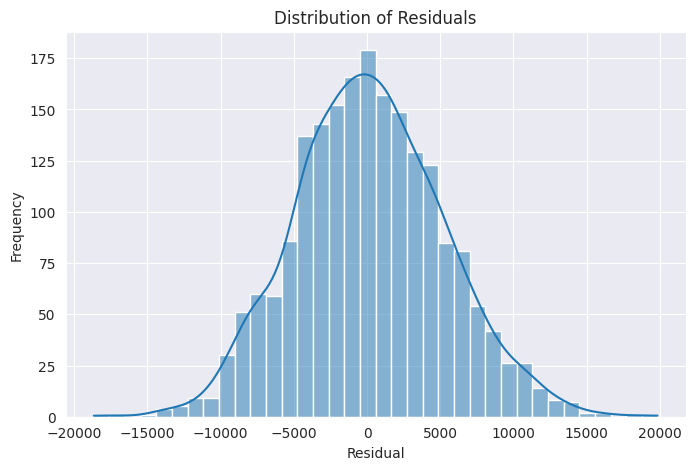

In [114]:
residual_distribution(y_test, y_pred_dt_gridsearch)

<h3 style="color:#0c99d1">RANDOM FOREST REGRESSOR</h3>
